In [1]:
#Multiple Linear Regression 

Implmenting Multiple LInear Regression Using SKlearn 


In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import datasets 
from sklearn.datasets import make_regression
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.graph_objects as go


In [72]:
X,Y = make_regression(n_samples=100,n_features=2,n_targets = 1 ,n_informative=2 ,random_state = 42,noise=50)

In [73]:
df = pd.DataFrame({'feature1': X[:,0],'target':Y})


In [74]:
df

,feature1,target
0,-1.191303,-22.779796
1,0.058209,-107.569629
2,0.586857,201.122932
3,0.473238,1.480178
4,0.738467,111.798503
...,...,...
95,0.361396,154.963515
96,0.296120,-17.725247
97,-0.990536,-191.245708
98,-0.460639,92.340622


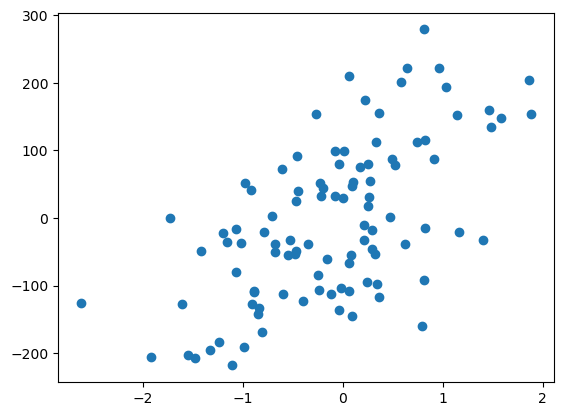

In [75]:
plt.scatter(df['feature1'],df['target'])

In [76]:
#Using Sklearn 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,random_state=2)

In [77]:
X_train.shape

(80, 2)

In [78]:
X_test.shape

(20, 2)

In [79]:
Y_test

array([ -15.73707681, -144.91884639,  115.0294264 ,   40.68349907,
         87.94270552,   98.40788138,  201.12293217, -195.31186445,
       -113.08727928, -122.56602246,   31.64096881, -206.64193127,
         52.08965309, -106.77158596,  -22.77979625,  -80.12365058,
          1.48017778,   87.49073886,  -54.13828773,  -32.85330478])

In [80]:
Lr = LinearRegression()
Lr.fit(X_train,Y_train)
Y_pred = Lr.predict(X_test)
print(Lr.coef_)
print(Lr.intercept_)

[78.77512128 76.96092489]
5.371977191895153


In [81]:
Y_pred

array([ -41.85618591, -140.36469846,  216.10880826,   52.22860696,
        102.78387949,  118.26152974,  220.18120682,  -84.1054171 ,
        -26.91144918, -138.14985412,   86.01408714, -166.49864796,
        -10.83393052,  -31.09288006,  -37.94412732,  -41.86301521,
         37.04634798,   33.85974634,  -10.78276169,  -73.63597073])

In [82]:
mean_absolute_error(Y_test,Y_pred)

43.49479825835798

In [83]:
mean_squared_error(Y_test,Y_pred)

2784.9743845959306

In [41]:
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

In [84]:
rmse

np.float64(38.96300412350455)

In [85]:
r2_score(Y_test,Y_pred)

0.7569831872791719

In [86]:
#Using My Own self Built Class 

class NewMLR : 
    def __init__(self):
        self.coef = None
        self.intercept = None 

    def fit (self,X_train,Y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        Betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(Y_train)

        self.coef = Betas[1:]
        self.intercept = Betas[0]

    def predict(self,X_test):
        Y_pred = self.intercept + np.dot(X_test,self.coef)
        return Y_pred


In [87]:
MiLr = NewMLR()

In [88]:
MiLr.fit(X_train,Y_train)
MiLr.coef
MiLr.intercept

np.float64(5.37197719189515)

In [90]:
MiLr.predict(X_test)

array([ -41.85618591, -140.36469846,  216.10880826,   52.22860696,
        102.78387949,  118.26152974,  220.18120682,  -84.1054171 ,
        -26.91144918, -138.14985412,   86.01408714, -166.49864796,
        -10.83393052,  -31.09288006,  -37.94412732,  -41.86301521,
         37.04634798,   33.85974634,  -10.78276169,  -73.63597073])